In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
control = '/data1/lmh_data/MINE/additional/ablation/control/exp.log'
remove_DoubleConv = '/data1/lmh_data/MINE/additional/ablation/remove_DoubleConv/exp.log'
remove_one_layer_unet = '/data1/lmh_data/MINE/additional/ablation/remove_one_layer_unet/exp.log'
half_channel = '/data1/lmh_data/MINE/additional/ablation/half_channel/exp.log'

In [3]:
def read_train_info(_path):
    with open(_path, 'r') as f:
        _datas = f.readlines()
    _loss = []
    for i in range(2, len(_datas), 2):
        _data = _datas[i].split()
        train_loss, test_loss = float(_data[-3]), float(_data[-1])
        _loss.append(test_loss)
    return gaussian_filter1d(_loss, sigma=6)

control_loss = read_train_info(control)
remove_DoubleConv_loss = read_train_info(remove_DoubleConv)
remove_one_layer_unet_loss = read_train_info(remove_one_layer_unet)
half_channel_loss = read_train_info(half_channel)

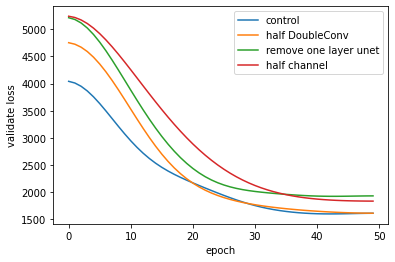

In [4]:
x = [i for i in range(len(control_loss))]
plt.plot(x, control_loss, label='control')
plt.plot(x, remove_DoubleConv_loss, label='half DoubleConv')
plt.plot(x, remove_one_layer_unet_loss, label='remove one layer unet')
plt.plot(x, half_channel_loss, label='half channel')

plt.xlabel('epoch')
plt.ylabel('validate loss')
plt.legend()
plt.savefig('figure_file/ablation(all).pdf', format='pdf', bbox_inches='tight')
plt.show()

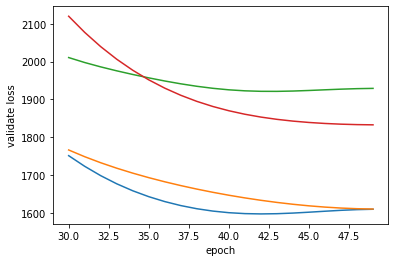

In [5]:
x = [i for i in range(len(control_loss))]
plt.plot(x[30:], control_loss[30:], label='control')
plt.plot(x[30:], remove_DoubleConv_loss[30:], label='half DoubleConv')
plt.plot(x[30:], remove_one_layer_unet_loss[30:], label='remove one layer unet')
plt.plot(x[30:], half_channel_loss[30:], label='half channel')

# plt.legend()
plt.xlabel('epoch')
plt.ylabel('validate loss')
plt.savefig('figure_file/ablation(part).pdf', format='pdf', bbox_inches='tight')
plt.show()